To demonstrate the ``CPPPlot().heatmap()`` method, we first load the example ``DOM_GSEC`` dataset and its respective features (see [Breimann24c]_):


In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_seq = aa.load_dataset(name="DOM_GSEC")
df_feat = aa.load_features(name="DOM_GSEC")
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)
aa.display_df(df_feat, show_shape=True, n_rows=7)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",4.729200,4.776785
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",4.106000,5.236574
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.048800,3.623912
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",2.833600,3.640617
6,"TMD_C_JMD_C-Pat...4,8)-KANM800103",Conformation,α-helix,α-helix,"Average relativ...sa-Tsong, 1980)",0.176000,0.087846,0.087846,0.140464,0.157561,0.000004,0.000113,"24,28",2.704000,4.076269
7,"TMD_C_JMD_C-Pat...,10)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.149000,0.073526,0.073526,0.133612,0.157088,0.000090,0.000714,"31,34,38",2.050800,2.338278


**CPP Analysis (group-level)**

The group-level feature value difference per scale subcategory (y-axis) and residue position (x-axis) can be visualized by providing the ``df_feat`` DataFrame:

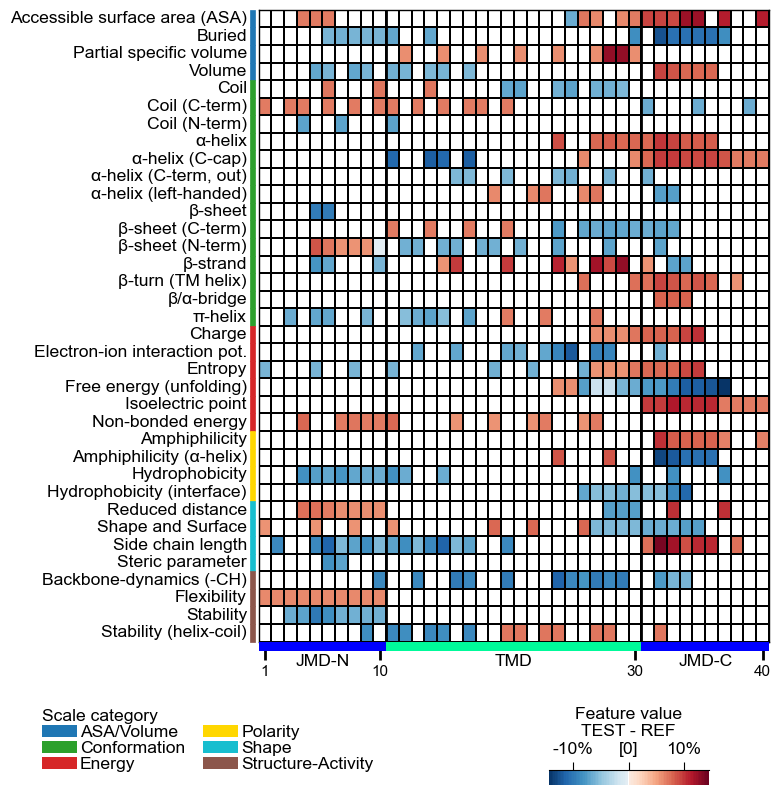

In [3]:
# Plot CPP heatmap at group-level
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=0.7, weight_bold=False)
cpp_plot.heatmap(df_feat=df_feat)
plt.show()

You can select a subset of features by filtering ``df_feat``: 

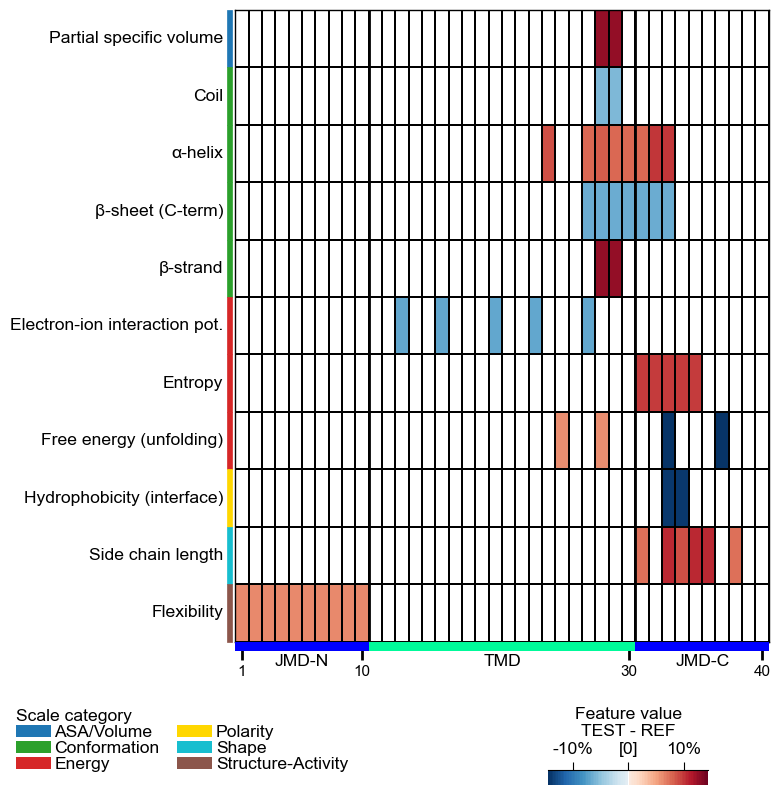

In [13]:
# Plot top 15 features
df_top15 = df_feat.head(15)
cpp_plot.heatmap(df_feat=df_top15)
plt.show()

Adjust the scale classification level (y-axis) using the ``col_cat`` parameter. Choose from the 'category', 'subcategory' (default), and 'scale_name' columns from the ``df_feat``:

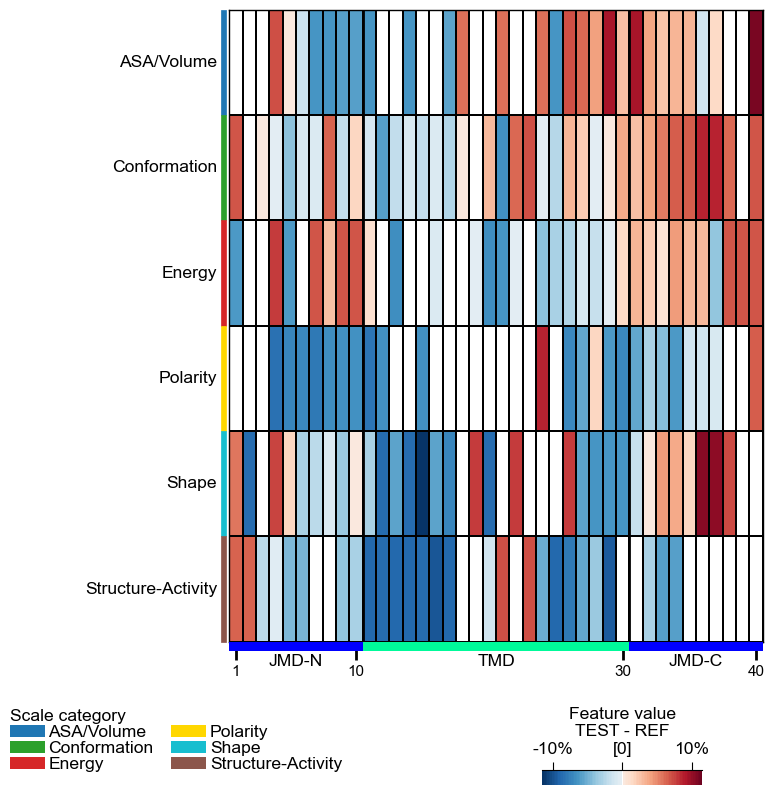

In [6]:
# Show heatmap with scales classified by categories
cpp_plot.heatmap(df_feat=df_feat, col_cat="category")
plt.show()

The numerical value shown in the heatmap can be adjusted by the ``col_val`` parameter, which specifies one of the following ``df_feat`` columns: 'mean_dif' (default), 'abs_mean_dif', 'abs_auc', or 'feat_importance':  

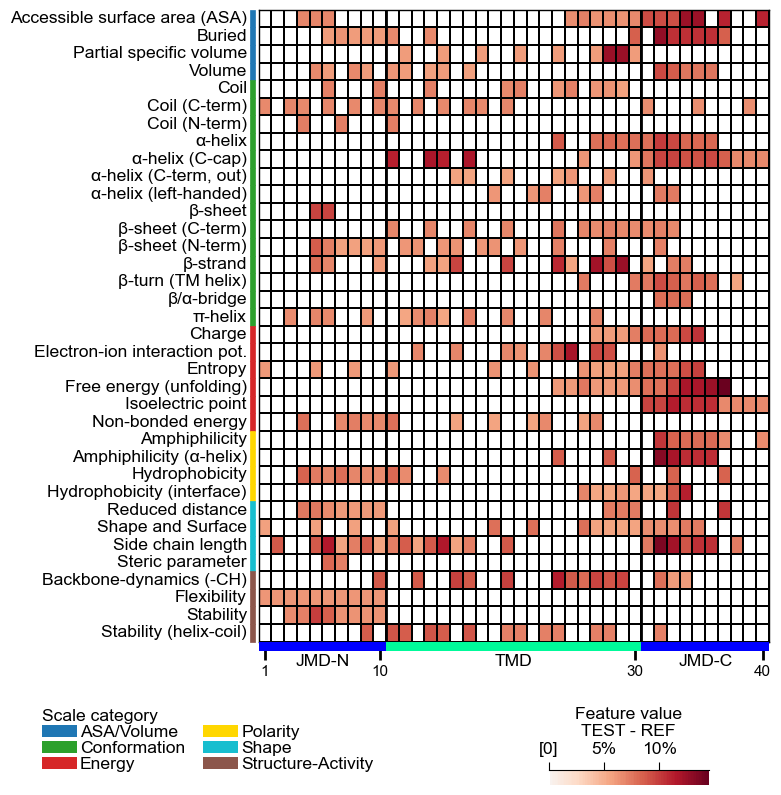

In [10]:
# Show heatmap with absolute feature value difference
cpp_plot.heatmap(df_feat=df_feat, col_val="abs_mean_dif")
plt.show()

Adjust the names of the test and reference datasets using the ``name_test`` (default='TEST') and ``name_ref`` (default='REF') parameters:

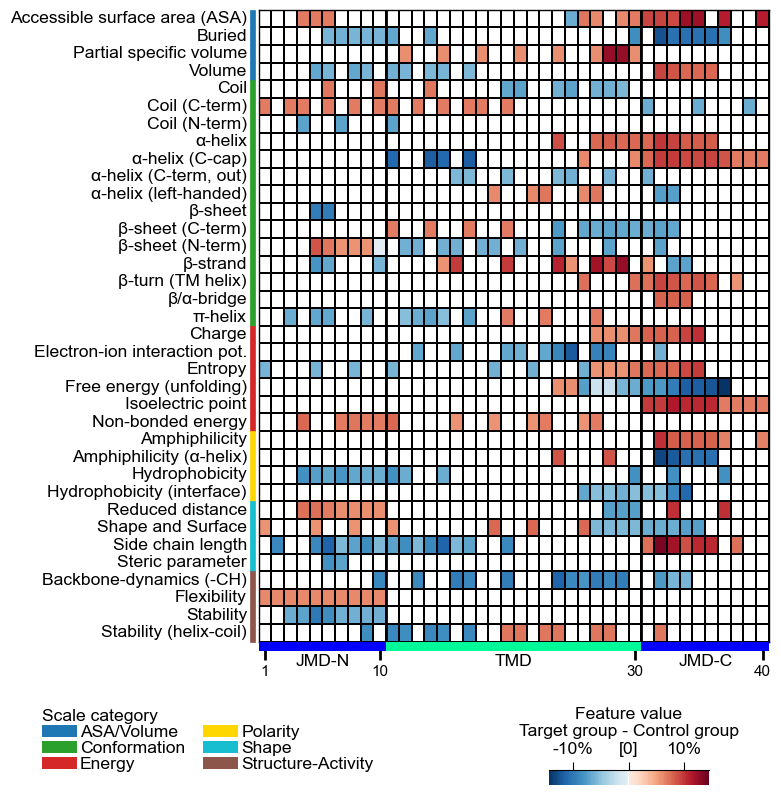

In [11]:
# Adjust dataset names shown in colorbar 
cpp_plot.heatmap(df_feat=df_feat, name_test="Target group", name_ref="Control group")
plt.show()

You can adjust the ``figsize`` (default=(8, 8)), useful if only a subset of features is shown:

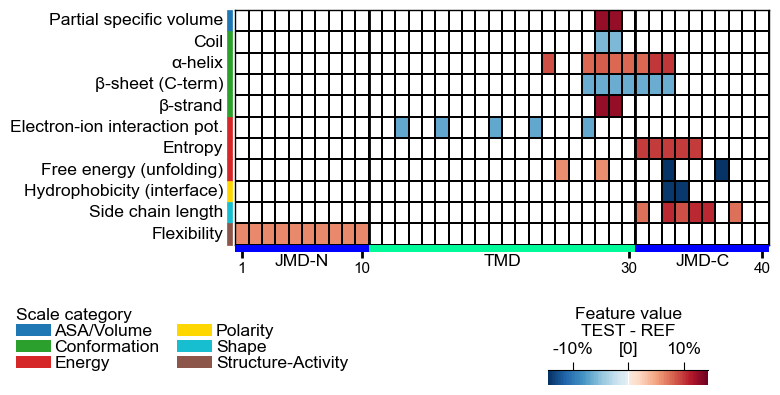

In [14]:
df_top15 = df_feat.head(15)
cpp_plot.heatmap(df_feat=df_top15, figsize=(8, 4))
plt.show()

You can adjust the ``start`` position and the ``tmd_len`` (default=20) by providing them as parameters. Change the length of the ``jmd_n`` and ``jmd_c`` using the ``CPPPlot`` object.

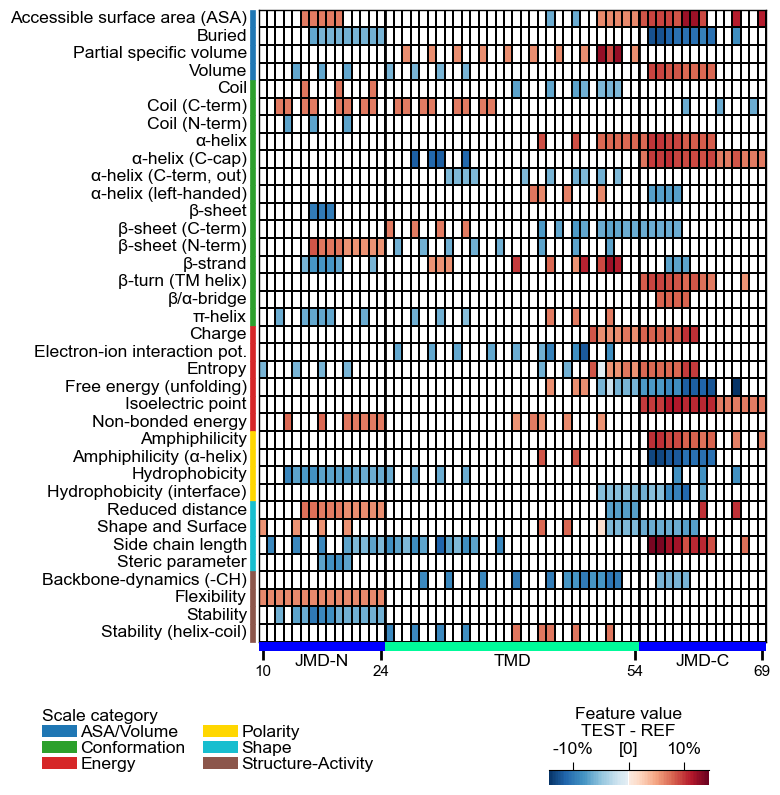

In [21]:
# Start at residue position 10 and adjust the length each part
cpp_plot = aa.CPPPlot(jmd_n_len=15, jmd_c_len=15)
cpp_plot.heatmap(df_feat=df_feat, start=10, tmd_len=30)
plt.show()

**CPP Analysis (sample-level)**

You can visualize how the general feature value difference is translated onto the sequence of a specific sample. To this end, you need to provide the corresponding sequence parameters: ``jmd_n_seq``, ``tmd_seq``, and ``jmd_c_seq``:

Sequence parts of first sample
FAEDVGSNKG AIIGLMVGGVVIATVIVITLVML KKKQYTSIHH


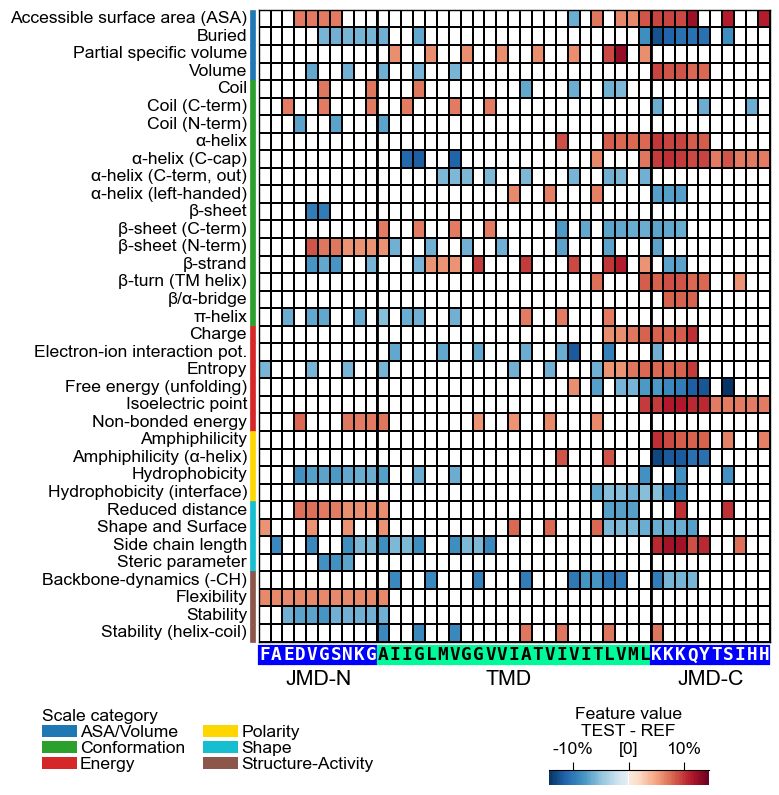

In [23]:
# Get sequence parts of first sample
cpp_plot = aa.CPPPlot()
jmd_n_seq, tmd_seq, jmd_c_seq = df_seq.loc[0, ["jmd_n", "tmd", "jmd_c"]]
args_seq = dict(jmd_n_seq=jmd_n_seq, tmd_seq=tmd_seq, jmd_c_seq=jmd_c_seq)
print("Sequence parts of first sample")
print(jmd_n_seq, tmd_seq, jmd_c_seq)

# Plot CPP profile for first sample
cpp_plot.heatmap(df_feat=df_feat, **args_seq)
plt.show()

You can customize the following color parameters: ``tmd_color`` (default='mediumspringgreen'), ``jmd_color`` (default='blue'), ``tmd_seq_color`` (default='black'), and ``jmd_seq_color`` (default='white'):

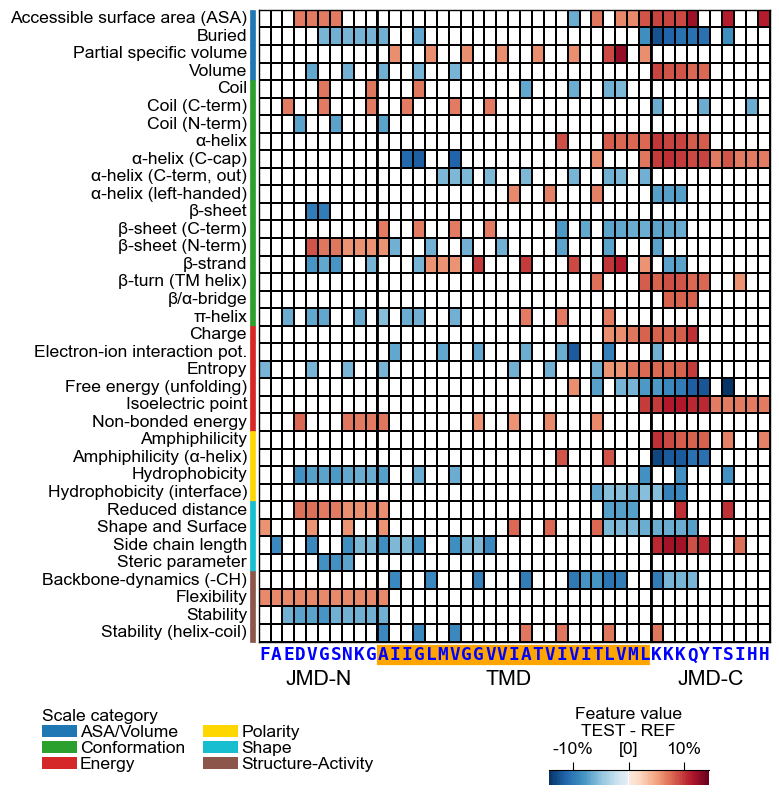

In [24]:
# Change default TMD-JMD colors
cpp_plot.heatmap(df_feat=df_feat, **args_seq, tmd_color="orange", jmd_color="white", tmd_seq_color="blue", jmd_seq_color="blue")
plt.show()

The fontsize of the sequence is optimized automatically. Set ``verbose=True`` to see the optimized size. You can set it manually using the ``seq_size`` parameter:

In [ ]:
# Change sequence size manually
cpp_plot.heatmap(df_feat=df_feat, **args_seq, seq_size=8)
plt.show()

This might result in suboptimal spacing among sequence characters. Adjust the font size of the part labels ('JMD-N', 'TMD', 'JMD-C') using ``fontsize_tmd_jmd``, which is set by default to the optimized sequence size. Change its weight using ``weight_tmd_jmd`` (default='normal') 

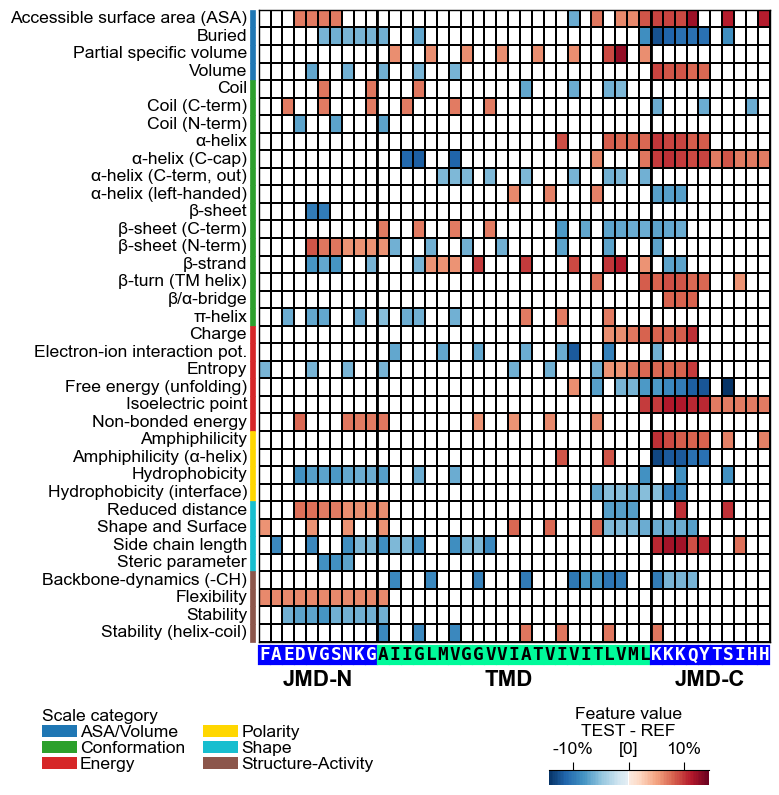

In [27]:
cpp_plot.heatmap(df_feat=df_feat, **args_seq, fontsize_tmd_jmd=16, weight_tmd_jmd="bold")
plt.show()

Display the xtick positions in addition to the sequence by setting ``add_xticks_pos=True`` (default=False):

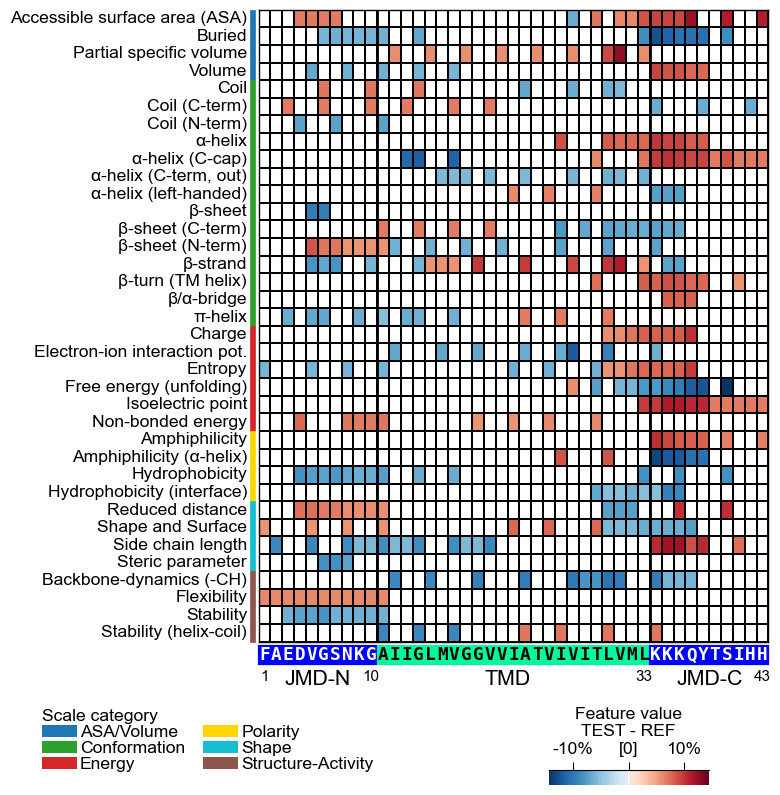

In [29]:
cpp_plot.heatmap(df_feat=df_feat, **args_seq, add_xticks_pos=True)
plt.show()